In [2]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg

sys.path.append('/home/galm/software/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1457

In [3]:
bgs = Bigram.objects.filter(docbigram__doc__query=qid).values('stem2','pos').annotate(
    n = models.Count('docbigram__pk')
).order_by('-n')


In [4]:
df = pd.DataFrame.from_dict(list(bgs))
allwords = df
df.head()

,n,pos,stem2
0,16157,1,develop
1,4592,-1,environment
2,4315,1,manag
3,3255,1,agricultur
4,2780,1,use


-1
        n  pos        stem2
1    4592   -1  environment
6    2305   -1         term
7    2269   -1       achiev
9    2039   -1       toward
10   2029   -1           un
11   1536   -1          the
12   1536   -1       promot
14   1248   -1       econom
15   1238   -1       ecolog
19   1109   -1      develop
20   1078   -1        ensur
25    946   -1      maximum
38    678   -1       social
40    613   -1            a
41    610   -1   agricultur
44    586   -1      support
45    585   -1      financi
47    579   -1        futur
48    570   -1       improv
54    544   -1        urban
66    458   -1       provid
69    437   -1    implement
71    428   -1       global
75    379   -1       enhanc
81    355   -1          new
82    354   -1       integr
85    349   -1       corpor
86    346   -1        creat
89    324   -1       assess
92    312   -1      increas
94    308   -1     maintain
97    298   -1      resourc
98    297   -1          use
99    297   -1       region
103   281   -1   

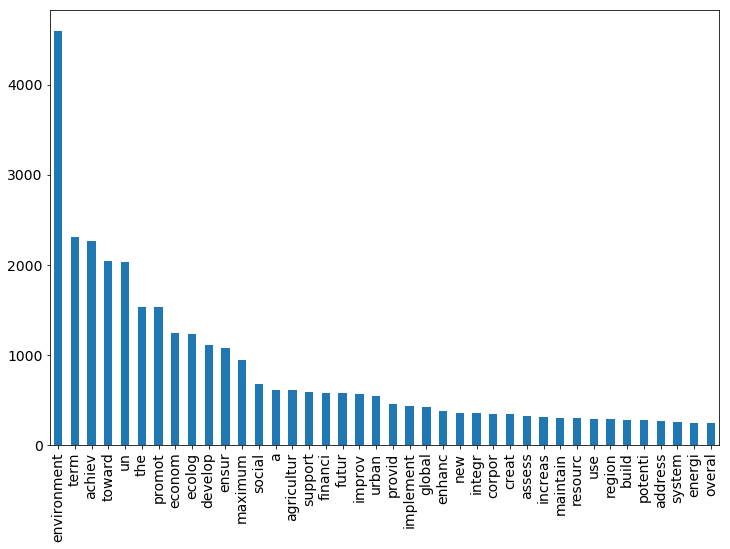

1
        n  pos       stem2
0   16157    1     develop
2    4315    1       manag
3    3255    1  agricultur
4    2780    1         use
5    2581    1      energi
8    2263    1     product
13   1456    1      forest
16   1236    1       water
17   1148    1       urban
18   1145    1        land
21   1064    1      assess
22   1034    1       yield
23    999    1         way
24    984    1       solut
26    936    1      altern
27    924    1     practic
28    896    1       indic
29    838    1        issu
30    787    1       futur
31    768    1      econom
32    741    1    approach
33    739    1     resourc
34    731    1      manner
35    723    1      growth
36    702    1    strategi
37    700    1   transport
39    637    1     tourism
42    593    1     harvest
43    588    1        crop
46    581    1        food
49    569    1   technolog
50    569    1     perform
51    556    1      suppli
52    553    1    competit
53    547    1  livelihood
55    540    1     process

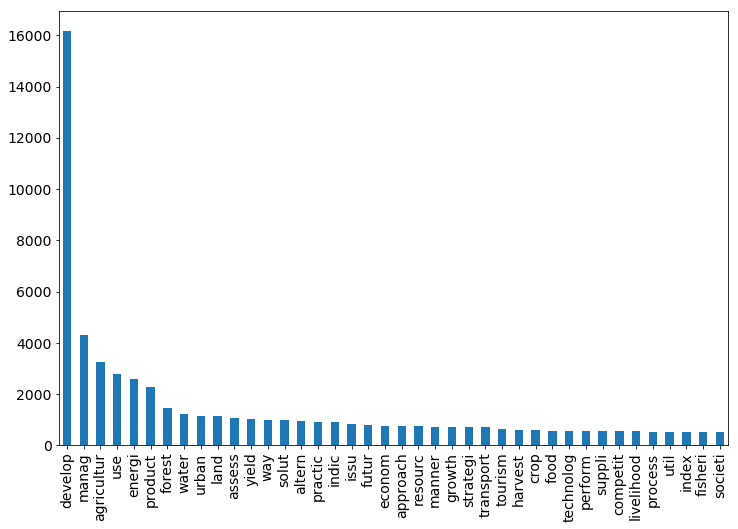

In [5]:
plt.rcParams["figure.figsize"] = [12,8]
for name, group in df.groupby('pos'):
    print(name)
    pdf = group.head(40)
    print(pdf)
    ax = pdf['n'].plot.bar()
    ax.set_xticklabels(pdf.stem2)
    ax.tick_params(labelsize=14)
    plt.show()

In [77]:
bgs = Bigram.objects.filter(docbigram__doc__query=qid).values('stem2','pos','docbigram__doc__PY').annotate(
    n = models.Count('docbigram__pk')
).order_by('-n')
df = pd.DataFrame.from_dict(list(bgs))
df.head()

,docbigram__doc__PY,n,pos,stem2
0,2016,1950,1,develop
1,2015,1692,1,develop
2,2014,1315,1,develop
3,2013,1278,1,develop
4,2012,1157,1,develop


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


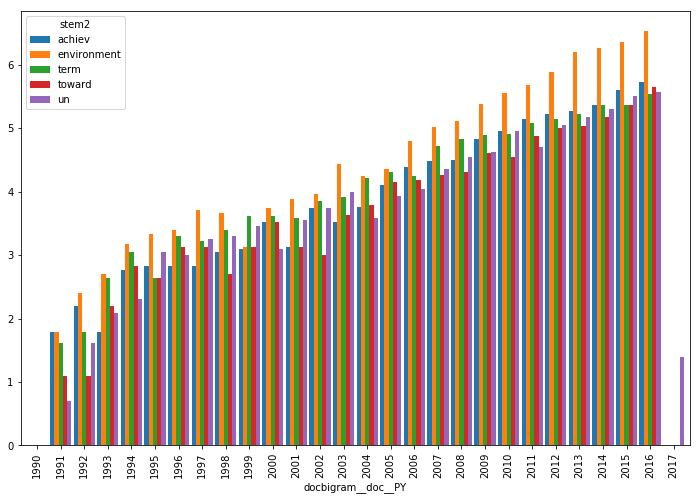

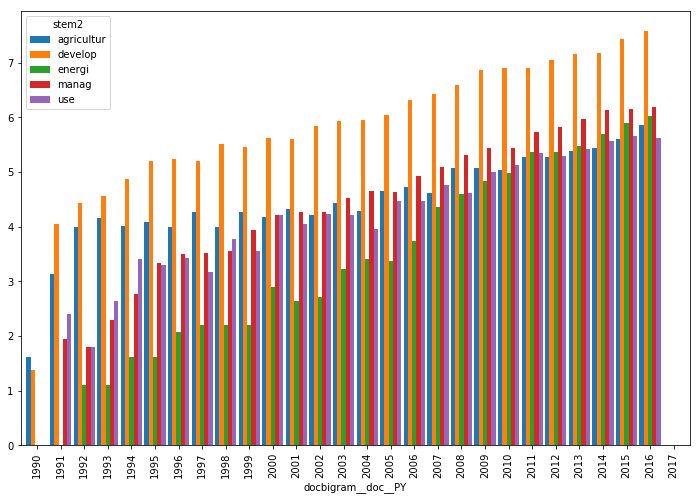

In [85]:
for i in [-1,1]:
    pdf = df[(df['stem2'].isin(list(allwords[allwords['pos']==i].head()['stem2']))) & (df['pos']==i)]
    pdf['n'] = np.log(pdf['n'])
    pdf = pd.pivot_table(data=pdf, 
                            index='docbigram__doc__PY',
                            columns='stem2',
                            values='n'
                        )
    pdf.plot.bar(width=0.9)
    plt.show()

In [65]:
pdf

stem2,agricultur,develop,environment,manag,use
docbigram__doc__PY,2003.000000,2003.500000,2003.88,2003.500000,2003.500000
n,115.814815,562.178571,9.28,159.846154,104.115385
pos,1.000000,1.000000,1.00,1.000000,1.000000
